# Read a meta image (.mhd + .raw)

In [1]:
import pandas as pd
import numpy as np
import array

filename = "/home/crct/CRCT/JupyterNotebook/image/6E/BONE_6E.mhd"

# read the .mhd header
header = pd.read_csv(filename, sep=' = ', header=None, index_col=0, engine='python')

# get dictionary to map ITK/VTK meta image types to numpy data types (with little-endian as default)
VTKtypes = {'MET_FLOAT':np.dtype('<f4'), 'MET_DOUBLE':np.dtype('<f8'), 'MET_UCHAR':np.dtype('<u1'), 'MET_CHAR':np.dtype('<i1'),
            'MET_USHORT':np.dtype('<u2'), 'MET_SHORT':np.dtype('<i2'), 'MET_UINT':np.dtype('<u4'), 'MET_INT':np.dtype('<i4'),
            'MET_ULONG':np.dtype('<u8'), 'MET_LONG':np.dtype('<i8') }

# get image data type
image_dtype = VTKtypes[header.loc['ElementType',1]]
if (header.loc['BinaryDataByteOrderMSB',1] == 'True'):
    image_dtype = image_dtype.newbyteorder('B') # change byte order if big-endian

# read the .raw binary
image = np.fromfile(filename.replace('mhd','raw'), dtype=image_dtype)
shape = np.fromstring(header.loc['DimSize',1], dtype=int, sep=' ')
image = image.reshape(shape,order='F')

header.style

,1
0,
ObjectType,Image
NDims,3
BinaryData,True
BinaryDataByteOrderMSB,False
CompressedData,False
TransformMatrix,1 0 0 0 1 0 0 0 1
Offset,-99 50.5 -99
CenterOfRotation,0 0 0
ElementSpacing,2 1 2


# working with the image data

# display a slice of the image

[ 2.  1.  2.]
[100 100 100]
[ 200.  100.  200.]


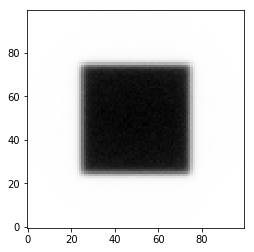

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

spacing = np.fromstring(header.loc['ElementSpacing',1], dtype=float, sep=' ')
print spacing
print shape
size = spacing * shape
print size

#plt.imshow(image[:,10,:].T, origin='lower', cmap=plt.cm.jet)
plt.imshow(image[:,99,:].T, origin='lower', cmap=plt.cm.Greys)

# display a profile of the image

In [3]:
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

#infos= image[x, slice , y]
#slice 99 = phantom surface
# slice 80 (99-20 (+1)) = 20 mm depth 

profile=image[49,80,:]
profiledata=np.zeros((shape[0], 2))

profiledata[:, 0]=np.arange(shape[0])*spacing[0]
profiledata[:, 1]=profile

profiledata[:, 0]=profiledata[:, 0]-(profiledata[:, 0].max()/2)

#profiledata[:, 1]=np.flipud(profiledata[:, 1])
#print profiledata
#plot profile
data = Scatter(x = profiledata[:, 0],
               y = profiledata[:, 1],
               mode = 'lines+markers')

layout = dict(title='My scatter plot',
              font=dict(family='Droid Sans Mono',size=18), 
                )

fig = dict(data=[data], layout=layout)
iplot(fig)




In [4]:
# export csv file 
np.savetxt('b_test.csv', profiledata, delimiter=',')
